## Section Week 5

In [42]:
# import pandas
import pandas as pd

# import geopandas
import geopandas as gpd

# import matplotlib
import matplotlib.pyplot as plt

In [3]:
# read in data
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')

In [17]:
# look at head of data
raw_eqk.head(3)

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake


In [16]:
# look at shape
raw_eqk.shape

(120108, 8)

In [18]:
# look at unique values 
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [31]:
# subset data by earthquake with magnitude greater or equal to 6.5
eqk = raw_eqk[raw_eqk['type'] == 'earthquake']

eqk = eqk[eqk['mag'] >= 6.5]

In [37]:
# convert to geopandas df
geometry = gpd.points_from_xy(eqk.longitude, eqk.latitude)
eqk = gpd.GeoDataFrame(eqk, crs = 'EPSG:4326', geometry = geometry)

<AxesSubplot:>

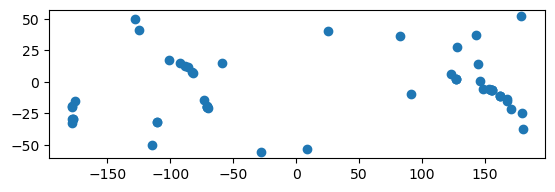

In [39]:
# plot earthquake data
eqk.plot()

In [41]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


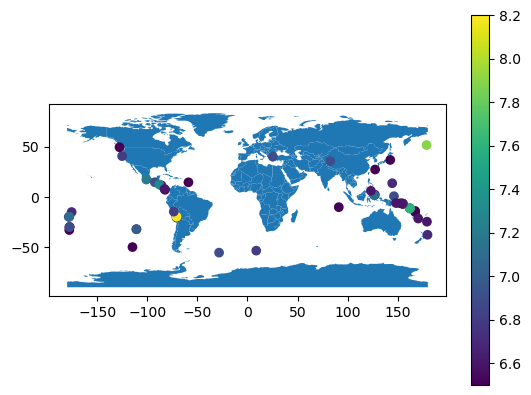

In [54]:
fig, ax = plt.subplots()

worldmap.plot(ax = ax)
eqk.plot(ax = ax,
        column = 'mag',
        legend = True)

plt.show()